In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import vice
from astropy.io import fits
import seaborn as sns

In [10]:
import arya
from surp import gce_math as gcem

# Stars

In [12]:
amarsi19 = pd.read_csv("../../data/amarsi_19.tsv", delimiter="\t *", comment="#", skiprows=[62, 63],)
amarsi19["[o/h]"] = amarsi19["[O/H]3N"]
amarsi19["[c/h]"] = amarsi19["[C/H]3N"]
amarsi19["[c/o]"] = amarsi19["[c/h]"] - amarsi19["[o/h]"] 

amarsi19["[o/h]_err"] = amarsi19["e_[O/H]3N"]
amarsi19["[c/h]_err"] = amarsi19["e_[C/H]3N"]
amarsi19["[c/o]_err"] = amarsi19["[o/h]_err"] + amarsi19["[c/h]_err"] 
amarsi19["[o/fe]"] = -amarsi19["[Fe/H]3L"] + amarsi19["[o/h]"]
amarsi19_sun = amarsi19.iloc[151]
amarsi19.drop(index=151, inplace=True)

/tmp/slurmtmp.24868848/ipykernel_141420/3998613471.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  amarsi19 = pd.read_csv("../../data/amarsi_19.tsv", delimiter="\t *", comment="#", skiprows=[62, 63],)


- \[Fe/H\]3L      7.4962
- C/H\]1N       8.4333
- \[O/H\]3N       8.6754

Amarsi is a reanalysis of nissen 2014 and nissen 2007, uses nlte 3d models

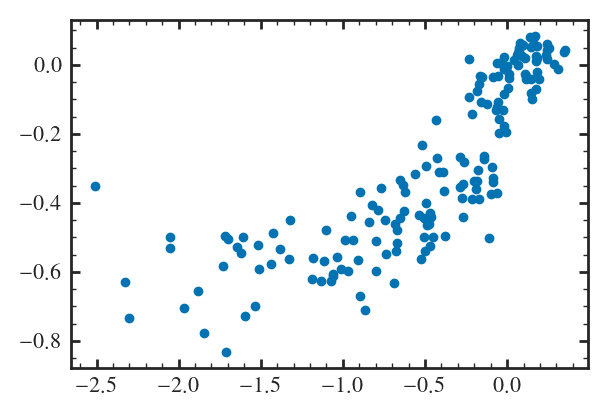

In [14]:
plt.scatter(amarsi19["[o/h]"], amarsi19["[c/o]"])

In [15]:
b18 = pd.read_csv("../../data/bedell18.dat", delimiter=" +", comment="#")

/tmp/slurmtmp.24868848/ipykernel_141420/4021858249.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  b18 = pd.read_csv("../../data/bedell18.dat", delimiter=" +", comment="#")


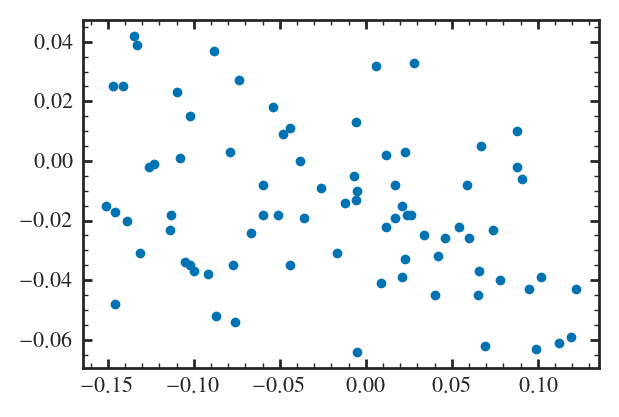

In [16]:
plt.scatter(b18["[OI/H]"], b18["[CI/H]"] - b18["[OI/H]"])

In [17]:
dm21 = pd.read_csv("../../data/dm21.csv", delimiter="\t *", comment="#")
dm21["[o/h]"] = dm21["[O1/Fe]"] + dm21["[Fe/H]"]
dm21["[c/o]"] = dm21["[C/O1]"]

/tmp/slurmtmp.24868848/ipykernel_141420/1036616196.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dm21 = pd.read_csv("../../data/dm21.csv", delimiter="\t *", comment="#")


In [19]:
bensby21 = pd.read_csv("../../data/bensby21.tsv", delimiter="\t *", comment="#",)
bensby19 = pd.read_csv("../../data/bensby19.tsv", delimiter="\t *", comment="#",)

bensby = bensby21.set_index("Name").join(bensby19.set_index("Name"),rsuffix="_b19", how="left")

bensby["[c/o]"] = bensby["[C/H]"] - bensby["[O/H]"]
bensby["[o/fe]"] = bensby["[O/H]"] - bensby["[Fe/H]"]
bensby["[o/h]"] = bensby["[O/H]"]
bensby["[c/o]_err"] = bensby["e_[C/O]"]
bensby["[o/h]_err"] = bensby["e_[O/H]"]

/tmp/slurmtmp.24868848/ipykernel_141420/2535395439.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  bensby21 = pd.read_csv("../../data/bensby21.tsv", delimiter="\t *", comment="#",)
/tmp/slurmtmp.24868848/ipykernel_141420/2535395439.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  bensby19 = pd.read_csv("../../data/bensby19.tsv", delimiter="\t *", comment="#",)


(1.0, -0.5)

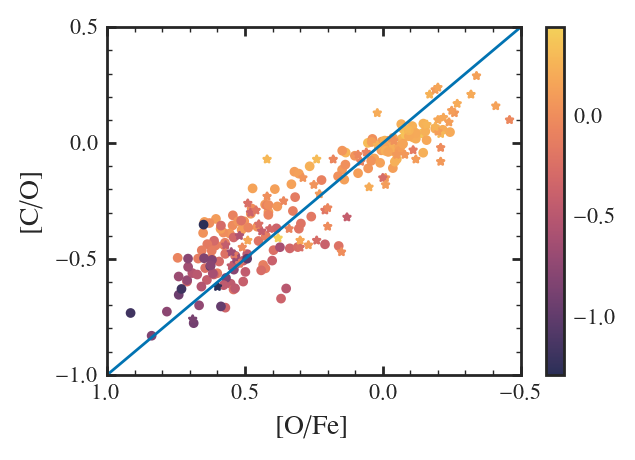

In [20]:
plt.scatter(amarsi19["[o/fe]"], amarsi19["[c/o]"], c=amarsi19["[o/h]"], clim=(-2.5, 0.5))
plt.scatter(bensby["[o/fe]"], bensby["[c/o]"], c=bensby["[O/H]"], marker="*")
plt.colorbar()
plt.xlabel("[O/Fe]")
plt.ylabel("[C/O]")
plt.gca().invert_xaxis()
plt.plot([-1, 1], [1, -1])
plt.ylim(-1, 0.5)
plt.xlim(1, -0.5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


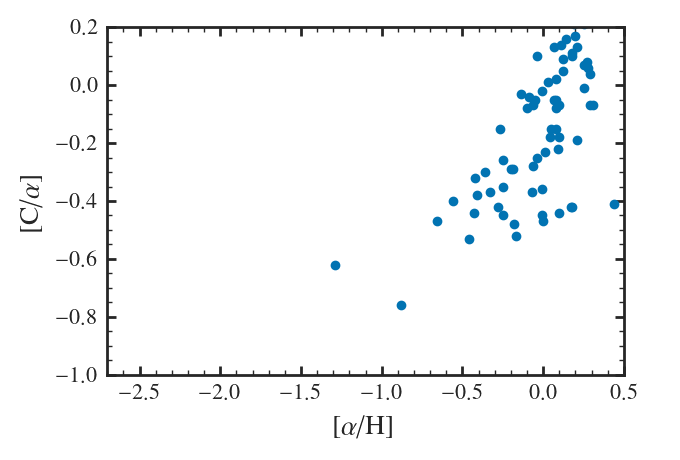

In [21]:
plt.xlim(-2.7, 0.5)

plt.scatter(bensby["[O/H]"], bensby["[c/o]"])
arya.Legend(loc=-1)
plt.ylim(-1, 0.2)
plt.xlabel("[$\\alpha$/H]")
plt.ylabel("[C/$\\alpha$]")

plt.savefig("amarsi_19.pdf")

In [22]:
berg19 = pd.read_csv("../../data/berg19.csv")
berg19 = berg19.iloc[:-1]
berg19["[c/o]"] = berg19.log_c_o + np.log10(12/16) - np.log10(vice.solar_z("c")/vice.solar_z("o"))
berg19["[o/h]"] = berg19.eps_o + np.log10(16) - np.log10(vice.solar_z("o")) - 12
berg19["[c/o]_err"] = berg19.log_c_o_err
berg19["[o/h]_err"] = berg19.eps_o_err

Below this is Lya, compilation of : a1: Cooke et al. (2015); 2: Dutta et al. (2014); 3: Cooke et al. (2014);
4: Ellison et al. (2010); 5: Cooke et al. (2011b); 6: This work; 7: Pettini et al.
(2008); 8: Morrison et al. (2016); 9: Srianand et al. (2010); 10: Cooke et al.
(2012); 11: Dessauges-Zavadsky et al. (2003)

In [23]:
cooke17 = pd.read_csv("../../data/cooke17.csv")

cooke17["[c/o]"] = cooke17.c_o
cooke17["[c/o]_err"] = cooke17.c_o_err
cooke17["[o/h]"] = cooke17.o_h
cooke17["[o/h]_err"] = cooke17.o_h_err


In [27]:
RL = pd.read_csv("../../data/extragalactic_RL.csv", sep="\t+")
RL["[c/o]"] = gcem.log_to_brak(RL.eps_c - RL.eps_o, "c", "o")
RL["[o/h]"] = gcem.eps_to_brak(RL.eps_o, "o")
RL["[c/o]_err"] = RL.c_err + RL.o_err
RL["[o/h]_err"] = RL.o_err 

/tmp/slurmtmp.24868848/ipykernel_141420/2184624168.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  RL = pd.read_csv("../../data/extragalactic_RL.csv", sep="\t+")


In [28]:
flf21 = pd.read_csv("../../data/FLF21.csv", delimiter="\s+", comment="#")
flf21["[o/h]"] = flf21["[O/Fe]"] + flf21["[Fe/H]"]
flf21["[c/o]"] = flf21["[C/Fe]"] - flf21["[O/Fe]"]

# NOT COMPARABLE SAMPLE< HAS GIANTZ

In [29]:
F09 = pd.read_csv("../../data/Fabbian09.csv", sep="\s+")

Redshift: (Pettini et al. 2000;
Fosbury & Villar-Martín et al. 2003; Erb et al. 2010; Christensen
et al. 2012; Bayliss et al. 2014; James et al. 2014; Stark et al.
2014; Steidel et al. 2016; Vanzella et al. 2016; Amorín et al.
2017; Berg et al. 2018; Rigby et al. 2018)

RL: (teal squares: Esteban et al. 2002, 2009,
2014; Pilyugin & Thuan 2005; García-Rojas & Esteban 2007;
López-Sánchez et al. 2007).

CL: Senchyna et al. (2017) and Peña-Guerrero et al. (2017)

MW stars: Gustafsson et al. (1999), Akerman
et al. (2004), Fabbian et al. (2009), and Nissen et al. (2014)

In [35]:
def read_skillman20():
    df = pd.read_csv("../../data/chaos_m101.dat", sep="\s+")
    df1 = pd.DataFrame()
    df1["[o/h]"] = gcem.eps_to_brak(df["O_H"], "o")
    df1["[c/o]"] = gcem.log_to_brak(df["C_O"], "c", "o")
    df1["[c/n]"] = gcem.log_to_brak(df["C_N"], "c", "n")
    df1["[n/o]"] = df1["[c/o]"] - df1["[c/n]"]

    df1["[o/h]_err"] = df["O_H_err"]
    df1["[c/o]_err"] = df["C_O_err"] * 12/16
    df1["[c/n]_err"] = df["C_N_err"] * 12/14
    df1["[n/o]_err"] = df["C_O_err"] + df["C_N_err"]

    df1.name="M101"
    return df1

skillman20 = read_skillman20()

In [36]:
def read_md22():
    df = pd.read_csv("../../data/md22.csv")
    df1 = pd.DataFrame()
    df1["[o/h]"] = gcem.eps_to_brak(df["O_H"], "o")
    df1["[c/h]"] = gcem.eps_to_brak(df["C_H"], "c")
    df1["[n/h]"] = gcem.eps_to_brak(df["N_H"], "n")

    df1["[c/n]"] = df1["[c/h]"] - df1["[n/h]"]
    df1["[c/o]"] = df1["[c/h]"] - df1["[o/h]"]
    df1["[n/o]"] = df1["[n/h]"] - df1["[o/h]"]

    df1["[o/h]_err"] = df["O_H_err"]
    df1["[c/o]_err"] = df["C_H_err"] + df["O_H_err"]
    df1["[n/o]_err"] = df["N_H_err"] + df["O_H_err"]
    df1["[c/n]_err"] = df["C_H_err"] + df["N_H_err"]

    df1.name = "Milkyway"
    return df1
md22 = read_md22()

In [37]:
all_abundances = pd.DataFrame(columns=["[c/o]", "[c/o]_err", "[o/h]", "[o/h]_err", "type"])


for df, label in [(RL, "RL"), (berg19, "dwarf"), (skillman20, "RL"), (md22, "RL"), 
                  (cooke17, "DLA"), (amarsi19, "star"), (bensby, "star")]:
    all_abundances = pd.concat([
        all_abundances, 
        pd.DataFrame({
        "[c/o]": df["[c/o]"],
        "[c/o]_err": df["[c/o]_err"],
        "[o/h]": df["[o/h]"],
        "[o/h]_err": df["[o/h]_err"],
        "type": [label]*len(df)
    })], ignore_index=True)


In [38]:
all_abundances.to_csv("all_data.csv")